In [ ]:
import numpy as np
from skimage import io
import cv2
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
def visualize(**images):
    """
    PLot images in one row.
    Parameters
    ----------
    **images : ndarray
        Images sent for plotting.
    """
    n = len(images)
    plt.figure(figsize=(12, 5))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([]) 
        plt.title(' '.join(name.split('_')).title())
        plt.imshow(image, cmap = plt.get_cmap(name = 'gray'))
    plt.show()

In [ ]:
url = 'https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png'
image = io.imread(url)

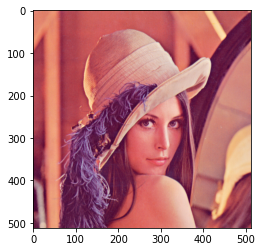

In [ ]:
plt.imshow(image, cmap = plt.get_cmap(name = 'gray'))

[Referans](https://docs.opencv.org/3.4/d2/d2c/tutorial_sobel_derivatives.html)

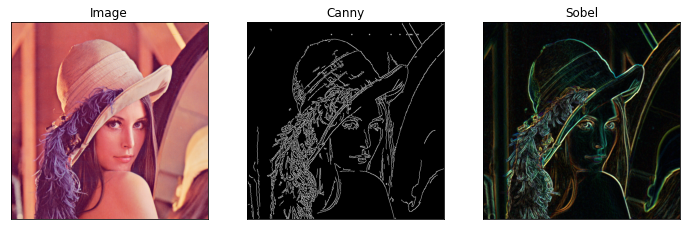

In [ ]:
blurred_img = cv2.GaussianBlur(image, (3, 3), 0)
canny_edges = cv2.Canny(image.astype('uint8'), 100, 200)
sobel_x = cv2.Sobel(blurred_img, cv2.CV_16S, 1, 0, ksize=3, scale=1)
sobel_y = cv2.Sobel(blurred_img, cv2.CV_16S, 0, 1, ksize=3, scale=1)
abs_x= cv2.convertScaleAbs(sobel_x) # contrast enhancement 
abs_y = cv2.convertScaleAbs(sobel_y)
sobel_edges = cv2.addWeighted(abs_x, 0.5, abs_y, 0.5, 0)
visualize(
    image=image,
    canny=canny_edges,
    sobel=sobel_edges
)

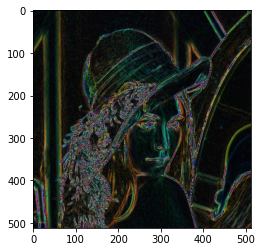

In [ ]:
edges = np.sqrt(sobel_x**2 + sobel_y**2)
plt.imshow(edges.astype('uint8'), cmap = plt.get_cmap(name = 'gray'))

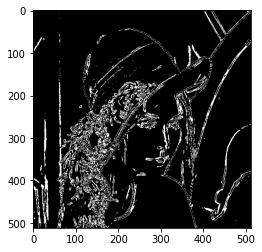

In [ ]:
_, thresholded = cv2.threshold(cv2.cvtColor(edges, cv2.COLOR_RGB2GRAY), 80, 255, cv2.THRESH_BINARY)
plt.imshow(thresholded.astype('uint8'), cmap = plt.get_cmap(name = 'gray'))